In [ ]:
!pip install pandas numpy matplotlib seaborn


**Import libraries and Load Dataset**

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading market sentiment dataset
sentiment_df = pd.read_csv("/content/drive/MyDrive/ds_Yati_Rathod/csv_files/fear_greed_index.csv")

# Load trader data from Hyperliquid
trades_df = pd.read_csv("/content/drive/MyDrive/ds_Yati_Rathod/csv_files/historical_data.csv")




/tmp/ipython-input-266725423.py:11: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades_df = pd.read_csv("/content/drive/MyDrive/ds_Yati_Rathod/csv_files/historical_data.csv")


**Preprocessing / Cleaning**

In [ ]:
print("Sentiment Data:")
sentiment_df.info()


Sentiment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
print("\nTrade Data:")
trades_df


Trade Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79161,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,14-03-2025 09:56,13835.140000,Close Long,1.149000,0x47bb9083e381e5872633041f83c16c02022100732025...,7.974332e+10,False,0.000000,3.030000e+14,1.740000e+12
79162,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,854.25,11011.28,SELL,14-03-2025 09:56,13825.140000,Close Long,98.153325,0x00000000000000000000000000000000000000000000...,7.974332e+10,False,0.000000,7.620000e+13,1.740000e+12
79163,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,14-03-2025 09:56,12970.890000,Close Long,1.149000,0x8aa79b725446e80a9b48041f83c2140134008353dab3...,7.974332e+10,False,0.000000,9.740000e+14,1.740000e+12
79164,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,14-03-2025 09:56,12960.890000,Close Long,1.149000,0xf8fa7c4492f459217408041f83c215017f00d24b96fe...,7.974332e+10,False,0.000000,6.020000e+14,1.740000e+12


In [ ]:
trades_df.info()
trades_df.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79166 entries, 0 to 79165
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           79166 non-null  object 
 1   Coin              79165 non-null  object 
 2   Execution Price   79165 non-null  float64
 3   Size Tokens       79165 non-null  float64
 4   Size USD          79165 non-null  float64
 5   Side              79165 non-null  object 
 6   Timestamp IST     79165 non-null  object 
 7   Start Position    79165 non-null  float64
 8   Direction         79165 non-null  object 
 9   Closed PnL        79165 non-null  float64
 10  Transaction Hash  79165 non-null  object 
 11  Order ID          79165 non-null  float64
 12  Crossed           79165 non-null  object 
 13  Fee               79165 non-null  float64
 14  Trade ID          79165 non-null  float64
 15  Timestamp         79165 non-null  float64
dtypes: float64(9), object(7)
memory usage: 9

16

Now that the files has been imported correctly, we start with the process of data cleaning.

In [ ]:
# Convert date/time columns to datetime
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
trades_df["Timestamp IST"] = pd.to_datetime(trades_df["Timestamp IST"], format="%d-%m-%Y %H:%M")

In [ ]:
# Extract just the date part from trader timestamps
trades_df["trade_date"] = trades_df["Timestamp IST"].dt.date
sentiment_df["date"] = sentiment_df["date"].dt.date

In [ ]:
trades_df.shape[1]

17

In [ ]:
sentiment_df["classification"] = sentiment_df["classification"].replace({
    "Extreme Fear": "Fear",
    "Extreme Greed": "Greed"
})

In [ ]:
merged_df = pd.merge(trades_df, sentiment_df[["date", "classification"]],left_on="trade_date", right_on="date", how="left")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79166 entries, 0 to 79165
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           79166 non-null  object        
 1   Coin              79165 non-null  object        
 2   Execution Price   79165 non-null  float64       
 3   Size Tokens       79165 non-null  float64       
 4   Size USD          79165 non-null  float64       
 5   Side              79165 non-null  object        
 6   Timestamp IST     79165 non-null  datetime64[ns]
 7   Start Position    79165 non-null  float64       
 8   Direction         79165 non-null  object        
 9   Closed PnL        79165 non-null  float64       
 10  Transaction Hash  79165 non-null  object        
 11  Order ID          79165 non-null  float64       
 12  Crossed           79165 non-null  object        
 13  Fee               79165 non-null  float64       
 14  Trade ID          7916

In [ ]:
# Rename sentiment column
merged_df.rename(columns={"classification": "Market Sentiment"}, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79166 entries, 0 to 79165
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           79166 non-null  object        
 1   Coin              79165 non-null  object        
 2   Execution Price   79165 non-null  float64       
 3   Size Tokens       79165 non-null  float64       
 4   Size USD          79165 non-null  float64       
 5   Side              79165 non-null  object        
 6   Timestamp IST     79165 non-null  datetime64[ns]
 7   Start Position    79165 non-null  float64       
 8   Direction         79165 non-null  object        
 9   Closed PnL        79165 non-null  float64       
 10  Transaction Hash  79165 non-null  object        
 11  Order ID          79165 non-null  float64       
 12  Crossed           79165 non-null  object        
 13  Fee               79165 non-null  float64       
 14  Trade ID          7916

In [ ]:
# Drop extra columns
merged_df.drop(columns=["date"], inplace=True)
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,Market Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79161,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,2025-03-14 09:56:00,13835.140000,Close Long,1.149000,0x47bb9083e381e5872633041f83c16c02022100732025...,7.974332e+10,False,0.000000,3.030000e+14,1.740000e+12,2025-03-14,Fear
79162,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,854.25,11011.28,SELL,2025-03-14 09:56:00,13825.140000,Close Long,98.153325,0x00000000000000000000000000000000000000000000...,7.974332e+10,False,0.000000,7.620000e+13,1.740000e+12,2025-03-14,Fear
79163,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,2025-03-14 09:56:00,12970.890000,Close Long,1.149000,0x8aa79b725446e80a9b48041f83c2140134008353dab3...,7.974332e+10,False,0.000000,9.740000e+14,1.740000e+12,2025-03-14,Fear
79164,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,2025-03-14 09:56:00,12960.890000,Close Long,1.149000,0xf8fa7c4492f459217408041f83c215017f00d24b96fe...,7.974332e+10,False,0.000000,6.020000e+14,1.740000e+12,2025-03-14,Fear


**Merge & Feature Engineering**

In [ ]:
# Convert to numeric safely
merged_df["Closed PnL"] = pd.to_numeric(merged_df["Closed PnL"], errors='coerce').fillna(0)
merged_df["Size USD"] = pd.to_numeric(merged_df["Size USD"], errors='coerce').fillna(0)

# Add a win/loss flag (1 if profit > 0)
merged_df["win"] = merged_df["Closed PnL"].apply(lambda x: 1 if x > 0 else 0)

# Normalized profit per $ traded (avoid division by 0)
merged_df["normalized_PnL"] = merged_df["Closed PnL"] / (merged_df["Size USD"] + 1e-6)

In [ ]:
merged_df.info()
merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79166 entries, 0 to 79165
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           79166 non-null  object        
 1   Coin              79165 non-null  object        
 2   Execution Price   79165 non-null  float64       
 3   Size Tokens       79165 non-null  float64       
 4   Size USD          79166 non-null  float64       
 5   Side              79165 non-null  object        
 6   Timestamp IST     79165 non-null  datetime64[ns]
 7   Start Position    79165 non-null  float64       
 8   Direction         79165 non-null  object        
 9   Closed PnL        79166 non-null  float64       
 10  Transaction Hash  79165 non-null  object        
 11  Order ID          79165 non-null  float64       
 12  Crossed           79165 non-null  object        
 13  Fee               79165 non-null  float64       
 14  Trade ID          7916

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,Market Sentiment,win,normalized_PnL
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed,0,0.000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed,0,0.000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed,0,0.000000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed,0,0.000000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79161,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,2025-03-14 09:56:00,13835.140000,Close Long,1.149000,0x47bb9083e381e5872633041f83c16c02022100732025...,7.974332e+10,False,0.000000,3.030000e+14,1.740000e+12,2025-03-14,Fear,1,0.008914
79162,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,854.25,11011.28,SELL,2025-03-14 09:56:00,13825.140000,Close Long,98.153325,0x00000000000000000000000000000000000000000000...,7.974332e+10,False,0.000000,7.620000e+13,1.740000e+12,2025-03-14,Fear,1,0.008914
79163,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,2025-03-14 09:56:00,12970.890000,Close Long,1.149000,0x8aa79b725446e80a9b48041f83c2140134008353dab3...,7.974332e+10,False,0.000000,9.740000e+14,1.740000e+12,2025-03-14,Fear,1,0.008914
79164,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.8900,10.00,128.90,SELL,2025-03-14 09:56:00,12960.890000,Close Long,1.149000,0xf8fa7c4492f459217408041f83c215017f00d24b96fe...,7.974332e+10,False,0.000000,6.020000e+14,1.740000e+12,2025-03-14,Fear,1,0.008914


In [ ]:
# Remove rows with more than 5 NaN values
merged_df.dropna(thresh=len(merged_df.columns) - 5, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79165 entries, 0 to 79164
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           79165 non-null  object        
 1   Coin              79165 non-null  object        
 2   Execution Price   79165 non-null  float64       
 3   Size Tokens       79165 non-null  float64       
 4   Size USD          79165 non-null  float64       
 5   Side              79165 non-null  object        
 6   Timestamp IST     79165 non-null  datetime64[ns]
 7   Start Position    79165 non-null  float64       
 8   Direction         79165 non-null  object        
 9   Closed PnL        79165 non-null  float64       
 10  Transaction Hash  79165 non-null  object        
 11  Order ID          79165 non-null  float64       
 12  Crossed           79165 non-null  object        
 13  Fee               79165 non-null  float64       
 14  Trade ID          79165 non

**Creating per day per trader summary**






In [ ]:
print(merged_df.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
trade_date          0
Market Sentiment    6
win                 0
normalized_PnL      0
dtype: int64


In [ ]:
# Group by date, account, and sentiment
daily_summary = merged_df.groupby(["trade_date", "Account", "Market Sentiment"]).agg({
    "Closed PnL": ["sum", "mean"],
    "normalized_PnL": "mean",
    "win": "mean",
    "Size USD": "mean"
}).reset_index()

# Rename columns for readability
daily_summary.columns = [
    "Date", "Account", "Sentiment", "Total PnL", "Avg PnL",
    "Avg Normalized PnL", "Win Rate", "Avg Trade Size"
]
daily_summary

,Date,Account,Sentiment,Total PnL,Avg PnL,Avg Normalized PnL,Win Rate,Avg Trade Size
0,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,0.000000,0.000000,0.000000,5556.203333
1,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-205.434737,-18.675885,-0.002072,0.363636,10291.213636
2,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-24.632034,-12.316017,-0.002322,0.000000,5304.975000
3,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,0.000000,0.000000,0.000000,5116.256667
4,2023-12-17,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,304.982785,21.784485,0.004058,0.500000,8305.572857
...,...,...,...,...,...,...,...,...
1078,2025-04-30,0x513b8629fe877bb581bf244e326a047b249c4ff1,Greed,0.000000,0.000000,0.000000,0.000000,22932.819688
1079,2025-05-01,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Neutral,1243.853569,4.975414,0.003937,0.324000,815.505760
1080,2025-05-01,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Neutral,1220.746604,87.196186,0.008013,0.500000,14373.198571
1081,2025-05-01,0x513b8629fe877bb581bf244e326a047b249c4ff1,Neutral,60544.304874,184.025243,0.006944,0.717325,22713.250030


## Data Visualization
 Relationship Between Sentiment and Performance

In [ ]:
from scipy.stats import ttest_ind

# Separate values by sentiment
fear_pnl = daily_summary[daily_summary["Sentiment"] == "Fear"]["Avg PnL"]
greed_pnl = daily_summary[daily_summary["Sentiment"] == "Greed"]["Avg PnL"]

# T-test to compare the means
t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


T-statistic: -0.2111, P-value: 0.8329


In [ ]:
# Separate values by sentiment
neutral_pnl = daily_summary[daily_summary["Sentiment"] == "Neutral"]["Avg PnL"]
fear_pnl = daily_summary[daily_summary["Sentiment"] == "Fear"]["Avg PnL"]
greed_pnl = daily_summary[daily_summary["Sentiment"] == "Greed"]["Avg PnL"]

# T-test to compare the means of Neutral and Fear
t_stat_neutral_fear, p_val_neutral_fear = ttest_ind(neutral_pnl, fear_pnl, equal_var=False)
print(f"T-statistic (Neutral vs Fear): {t_stat_neutral_fear:.4f}, P-value (Neutral vs Fear): {p_val_neutral_fear:.4f}")

# T-test to compare the means of Neutral and Greed
t_stat_neutral_greed, p_val_neutral_greed = ttest_ind(neutral_pnl, greed_pnl, equal_var=False)
print(f"T-statistic (Neutral vs Greed): {t_stat_neutral_greed:.4f}, P-value (Neutral vs Greed): {p_val_neutral_greed:.4f}")


T-statistic (Neutral vs Fear): -0.4827, P-value (Neutral vs Fear): 0.6296
T-statistic (Neutral vs Greed): -0.8351, P-value (Neutral vs Greed): 0.4041


**Insight: Neutral sentiment is not statistically different from either Fear or Greed. Consider replacing Neutral with the sentiment that has a closer average PnL.**
**Based on average PnL, consider replacing Neutral with Fear**

**A t-test checks whether the difference in performance between Fear and Greed is statistically significant.**

**If p_val < 0.05, the difference is meaningful**

In [ ]:
daily_summary["Sentiment"] = daily_summary["Sentiment"].replace("Neutral", "Fear")
daily_summary

,Date,Account,Sentiment,Total PnL,Avg PnL,Avg Normalized PnL,Win Rate,Avg Trade Size
0,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,0.000000,0.000000,0.000000,5556.203333
1,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-205.434737,-18.675885,-0.002072,0.363636,10291.213636
2,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-24.632034,-12.316017,-0.002322,0.000000,5304.975000
3,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,0.000000,0.000000,0.000000,5116.256667
4,2023-12-17,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,304.982785,21.784485,0.004058,0.500000,8305.572857
...,...,...,...,...,...,...,...,...
1078,2025-04-30,0x513b8629fe877bb581bf244e326a047b249c4ff1,Greed,0.000000,0.000000,0.000000,0.000000,22932.819688
1079,2025-05-01,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,1243.853569,4.975414,0.003937,0.324000,815.505760
1080,2025-05-01,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Fear,1220.746604,87.196186,0.008013,0.500000,14373.198571
1081,2025-05-01,0x513b8629fe877bb581bf244e326a047b249c4ff1,Fear,60544.304874,184.025243,0.006944,0.717325,22713.250030


/tmp/ipython-input-555824337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_summary, x="Sentiment", y="Total PnL", palette="Set2")


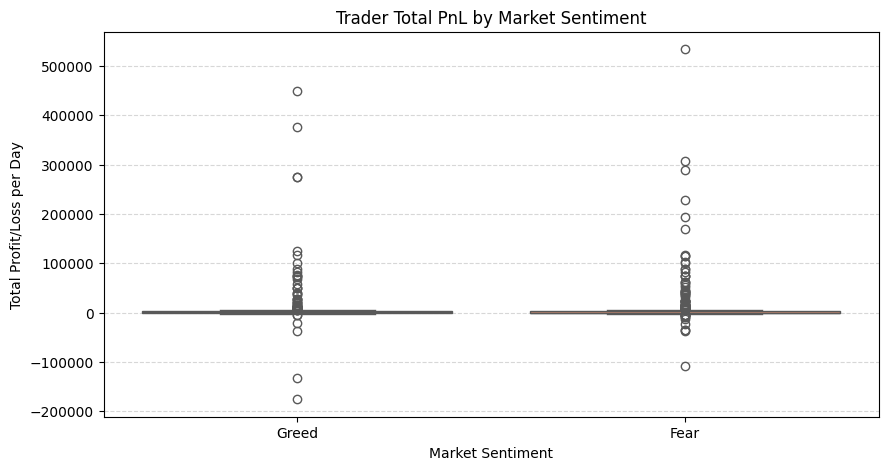

In [ ]:
#  Total PnL by Sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=daily_summary, x="Sentiment", y="Total PnL", palette="Set2")
plt.title("Trader Total PnL by Market Sentiment")
plt.ylabel("Total Profit/Loss per Day")
plt.xlabel("Market Sentiment")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/ds_Yati_Rathod/outputs/total_pnl_by_sentiment.png')
plt.show()


/tmp/ipython-input-461669330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_summary, x="Sentiment", y="Win Rate", palette="Set3")


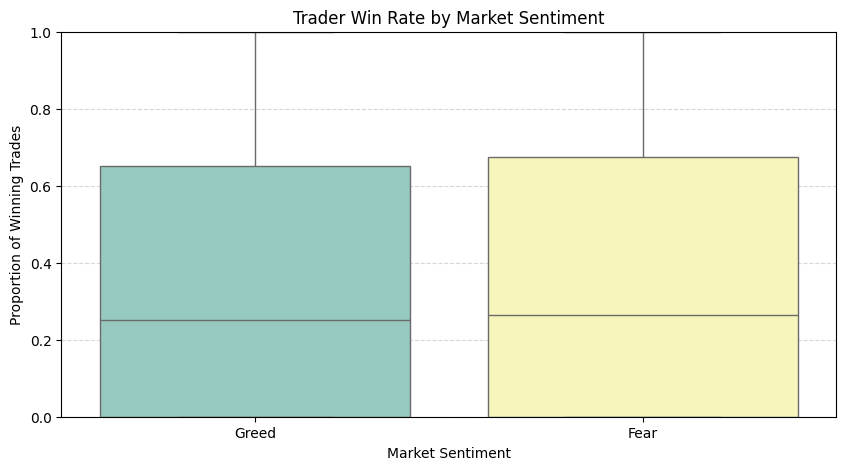

In [ ]:
# Win rate by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=daily_summary, x="Sentiment", y="Win Rate", palette="Set3")
plt.title("Trader Win Rate by Market Sentiment")
plt.ylabel("Proportion of Winning Trades")
plt.xlabel("Market Sentiment")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/ds_Yati_Rathod/outputs/win_rate__by_sentiment.png')
plt.show()


**This shows how often traders win on Fear days vs Greed days.**

**A higher win rate on Greed may mean people trade more confidently and successfully.**

**If win rate is lower on Fear, it might suggest that fear leads to worse decisions.**

/tmp/ipython-input-4098641028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_summary, x="Sentiment", y="Avg Normalized PnL", palette="coolwarm")


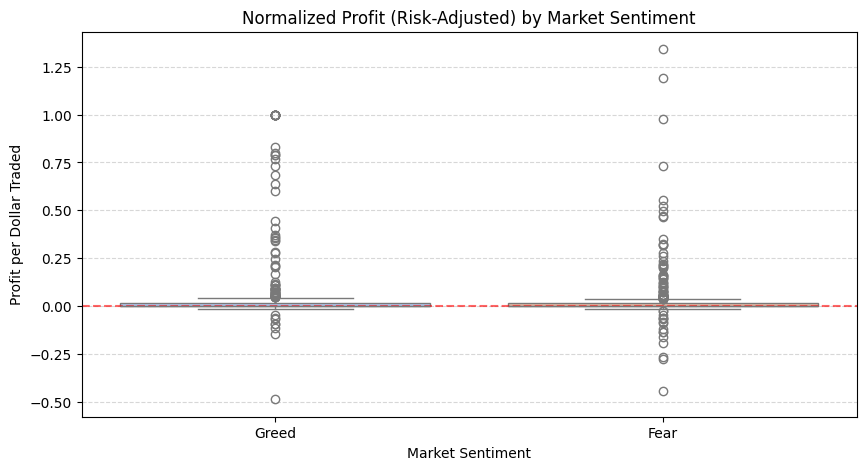

In [ ]:
# Normalized Profit (Risk-Adjusted) by Sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=daily_summary, x="Sentiment", y="Avg Normalized PnL", palette="coolwarm")
plt.title("Normalized Profit (Risk-Adjusted) by Market Sentiment")
plt.ylabel("Profit per Dollar Traded")
plt.xlabel("Market Sentiment")
plt.axhline(0, color='red', linestyle='--', alpha=0.6)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/ds_Yati_Rathod/outputs/normalized_profit_by_sentiment.png')
plt.show()


**This shows how efficient traders are during Fear vs Greed — we divide profit by how much they traded.**

**A positive normalized PnL means traders are getting more return per unit of risk.**

**The red dashed line at 0 shows break-even.**

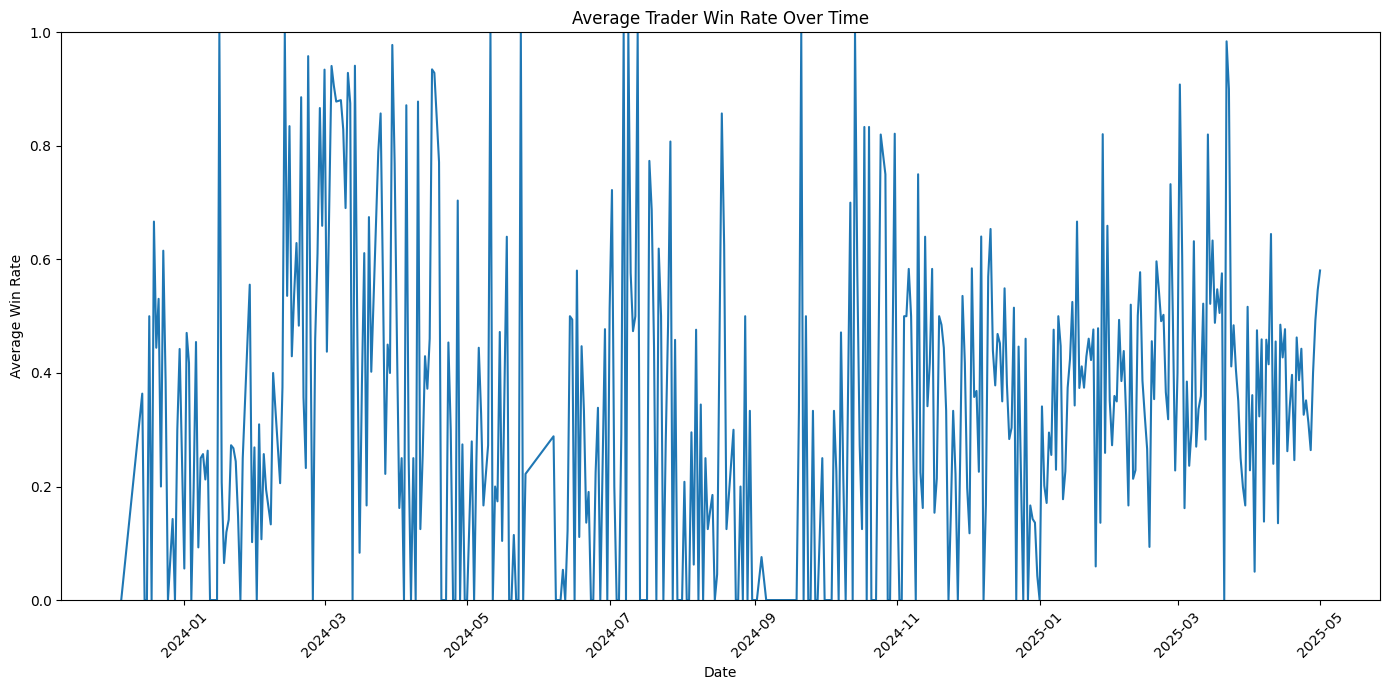

In [ ]:
# Aggregate daily_summary by date to get average win rate per day
daily_avg_win_rate = daily_summary.groupby("Date")["Win Rate"].mean().reset_index()

# Convert 'Date' to datetime for plotting
daily_avg_win_rate['Date'] = pd.to_datetime(daily_avg_win_rate['Date'])

# Create the line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg_win_rate, x="Date", y="Win Rate")
plt.title("Average Trader Win Rate Over Time")
plt.ylabel("Average Win Rate")
plt.xlabel("Date")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_Yati_Rathod/outputs/trader_win_rate_over_time.png')
plt.show()

In [ ]:
# logic to extract insight
if fear_pnl.mean() < greed_pnl.mean():
    print("Insight: Traders perform better during Greed sentiment days.")
else:
    print("Insight: Traders perform better during Fear sentiment days.")



Insight: Traders perform better during Greed sentiment days.


In [ ]:
daily_summary.to_csv('cleaned_merged_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_merged_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Modelling**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Encode sentiment labels
daily_summary['Sentiment_Label'] = daily_summary['Sentiment'].map({'Fear': 0, 'Greed': 1})

# Select features
features = ['Total PnL','Avg PnL','Avg Normalized PnL','Win Rate','Avg Trade Size']
X = daily_summary[features]
y = daily_summary['Sentiment_Label']



In [ ]:

# Fill missing values if any
X = X.fillna(0)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")


Model Accuracy: 0.57


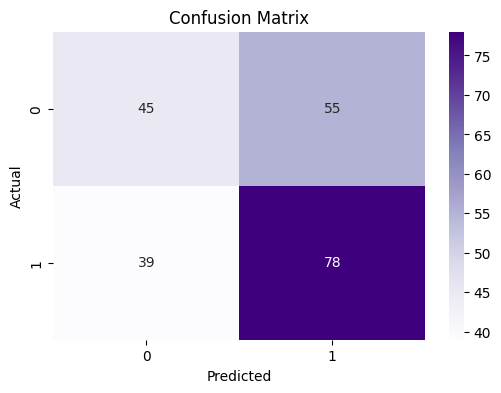

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("/content/drive/MyDrive/ds_Yati_Rathod/outputs/confusion_matrix.png")
plt.show()


In [ ]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.45      0.49       100
           1       0.59      0.67      0.62       117

    accuracy                           0.57       217
   macro avg       0.56      0.56      0.56       217
weighted avg       0.56      0.57      0.56       217



**Higher recall for class 1 (67%) means the model does a decent job identifying true positives (likely traders with strong performance or sentiment, depending on your label).**

**Balanced support indicates no significant class imbalance**

**Low recall for class 0 (45%) indicates the model often fails to detect actual 0s.**

**False positives (55) are high → classifying 0s as 1s too often.**